In [1]:
import numpy as np

lucky_box = np.load('luckybox.npy')
unique, count = np.unique(lucky_box, return_counts=True)

In [2]:
gt_probability = {}
for n, cnt in zip(unique, count):
    gt_probability[str(int(n))] = cnt/np.sum(count)
gt_probability

{'0': 0.714285712244898,
 '1': 2.857142848979592e-09,
 '2': 0.01428571424489796,
 '3': 0.042857142734693876,
 '4': 0.05714285697959184,
 '5': 0.1714285709387755}

In [3]:
def check(error):
    if error < 0.0001 :
        print('pass the test')
    else:
        print('fail the test')
        
def eval(my_probability):
    error = 0
    for key, value in gt_probability.items():
        error += np.abs(gt_probability[key]-my_probability[key])
    # print(gt_probability)
    # print(my_probability)
    # print('error: ', error)
    return error
    
my_probability = {'0': 1/6, '1': 1/6, '2': 1/6, '3': 1/6, '4': 1/6, '5': 1/6}
error = eval(my_probability)
check(error)

fail the test


## 이번 실습은 numpy library를 사용하지 않고 구현해야 합니다.

### 1번 문제: 전체 탐색을 통한 counting 

In [4]:
### Your code - Start ###
count = [0 for i in range(6)]
# print(count)
for i in range(len(lucky_box)):
  j = int(lucky_box[i])
  count[j] += 1
for i in range(6):
  count[i] = count[i] / len(lucky_box)
my_probability = {'0': count[0], '1': count[1], '2': count[2], '3': count[3], '4': count[4], '5': count[5]}
### Your code - End ###
print(my_probability)
error = eval(my_probability)
check(error)

{'0': 0.714285712244898, '1': 2.857142848979592e-09, '2': 0.01428571424489796, '3': 0.042857142734693876, '4': 0.05714285697959184, '5': 0.1714285709387755}
pass the test


### 2번 문제: random sampling을 통한 counting

In [5]:
import random
n = 100_000_000
### Your code - Start ###
count = [0 for i in range(6)]
# print(count)
for i in range(n):
  a = random.randrange(0,len(lucky_box))
  b = int(lucky_box[a])
  count[b] += 1
### Your code - End ###
for i in range(6):
  count[i] = count[i] / n
my_probability = {'0': count[0], '1': count[1], '2': count[2], '3': count[3], '4': count[4], '5': count[5]}
print(my_probability)
error = eval(my_probability)
# print(error)
check(error)

{'0': 0.71427235, '1': 1e-08, '2': 0.01429856, '3': 0.04286248, '4': 0.05714222, '5': 0.17142438}
pass the test


### 3번 error analysis

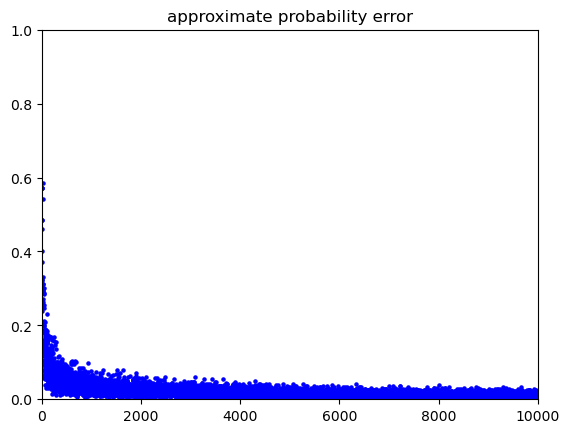

In [20]:
import random
import matplotlib.pyplot as plt

### Your code - Start ###
n = 10_000
# n = 50
count = [0 for i in range(6)]
my_probability = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
# print(count)
for i in range(1, n + 1):
  #print(i)
  # if i != 0:
  count = [0 for i in range(6)]
  for j in range(i):
    a = random.randrange(0,len(lucky_box))
    b = int(lucky_box[a])
    count[b] += 1
    

  # if i == 0:
  #   my_probability = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
    
  # else:
  my_probability = {'0': count[0]/i,
                    '1': count[1]/i,
                    '2': count[2]/i,
                    '3': count[3]/i,
                    '4': count[4]/i,
                    '5': count[5]/i}
  
  # print(i)
  # print(my_probability)
  # print(eval(my_probability))
  plt.scatter(i, eval(my_probability), color = 'blue', s = 5)
# for i in range(6):
#   count[i] = count[i] / n
#my_probability = {'0': count[0], '1': count[1], '2': count[2], '3': count[3], '4': count[4], '5': count[5]}
#print(my_probability)
error = eval(my_probability)
# print(error)
# check(error)
plt.title("approximate probability error")
plt.ylim(0.0,1.0)
plt.xlim(0,10000)
plt.show()
### Your code - End ###

### 고찰

1번과 2번을 구현하는 과정은 컴파일 시간이 오래걸리는 것을 제외한다면 큰 어려움을 느끼지 않았습니다. 하지만 extra 점수인 3번을 구현할 때는 문제를 이해하는 과정에서 어려움을 느꼈습니다. 또, 그래프에 점을 찍는 과정에서 linear하게 구현되는 것을 보완하기 위해 여러가지 방법을 고민하던 도중에 위와 같은 방법을 생각해낼 수 있었습니다.